<a href="https://colab.research.google.com/github/Kalpesh-Nandedkar/CodeClauseInternship_Sentiment-Analysis/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project : Sentiment Analysis**


Author : Kalpesh Nandedkar


Dataset: https://www.kaggle.com/datasets/tariqsays/sentiment-dataset-with-1-million-tweets

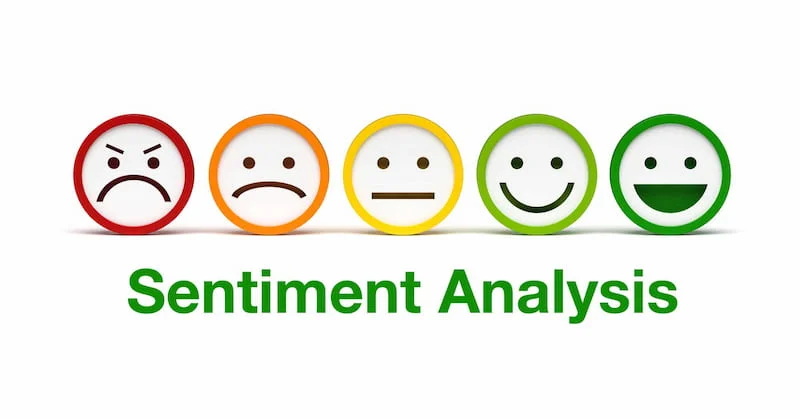

##Import Libraries

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go
from sklearn.linear_model import LogisticRegression
import re
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score as acc
from sklearn.pipeline import Pipeline
from wordcloud import WordCloud

##Datasets Loading

In [18]:
df = pd.read_csv("/content/drive/MyDrive/CodeClause Internship Projects/Sentiment Analysis/dataset.csv")

## Viewing the Dataset

In [19]:
df.head(5)

,Text,Language,Label
0,@Charlie_Corley @Kristine1G @amyklobuchar @Sty...,en,litigious
1,#BadBunny: Como dos gotas de agua: Joven se di...,es,negative
2,https://t.co/YJNiO0p1JV Flagstar Bank disclose...,en,litigious
3,Rwanda is set to host the headquarters of Unit...,en,positive
4,OOPS. I typed her name incorrectly (today’s br...,en,litigious


In [20]:
df.columns

Index(['Text', 'Language', 'Label'], dtype='object')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937854 entries, 0 to 937853
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Text      937854 non-null  object
 1   Language  937831 non-null  object
 2   Label     937854 non-null  object
dtypes: object(3)
memory usage: 21.5+ MB


##***Data Wrangling***

####Cleaning the Dataset

In [22]:
df['Clean'] = df.apply(lambda row: row['Text'].lower(),axis=1)
df['Clean'] = df.apply(lambda row: re.sub("@[A-Za-z0-9_]+","", row['Clean']),axis=1)
df['Clean'] = df.apply(lambda row: re.sub("#[A-Za-z0-9_]+","", row['Clean']),axis=1)
df['Clean'] = df.apply(lambda row: re.sub(r"http\S+","", row['Clean']),axis=1)
df['Clean'] = df.apply(lambda row: re.sub(r"www.\S+","", row['Clean']),axis=1)
df['Clean'] = df.apply(lambda row: re.sub('[()!?]'," ", row['Clean']),axis=1)
df['Clean'] = df.apply(lambda row: re.sub('\[.*?\]'," ", row['Clean']),axis=1)
df['Clean'] = df.apply(lambda row: re.sub("[^a-z0-9]"," ", row['Clean']),axis=1)

In [23]:
df.head(5)

,Text,Language,Label,Clean
0,@Charlie_Corley @Kristine1G @amyklobuchar @Sty...,en,litigious,testimony is not evidence in a court of la...
1,#BadBunny: Como dos gotas de agua: Joven se di...,es,negative,como dos gotas de agua joven se disfraza de...
2,https://t.co/YJNiO0p1JV Flagstar Bank disclose...,en,litigious,flagstar bank discloses a data breach that im...
3,Rwanda is set to host the headquarters of Unit...,en,positive,rwanda is set to host the headquarters of unit...
4,OOPS. I typed her name incorrectly (today’s br...,en,litigious,oops i typed her name incorrectly today s br...


In [24]:
# extract the hashtag
def hashtag_extract(tweets):
    hashtags = []
    # loop words in the tweet
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags

# extract hashtags from non-racist/sexist tweets
ht_positive = hashtag_extract(df['Text'][df['Label']== 'positive'])

# extract hashtags from racist/sexist tweets
ht_negative = hashtag_extract(df['Text'][df['Label']=='negative'])

ht_positive[:5]
# unnest list
ht_positive = sum(ht_positive, [])
ht_negative = sum(ht_negative, [])

## ***Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

###**Visualizing The Top 10 Positive Hashtag**

In [27]:
# Creatting table for Positive #Hashtag
freq = nltk.FreqDist(ht_positive)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,SovereignGroup,1
1,SovereignAfrica,1
2,UNDP,1
3,Rwanda,5
4,kyrgios,1


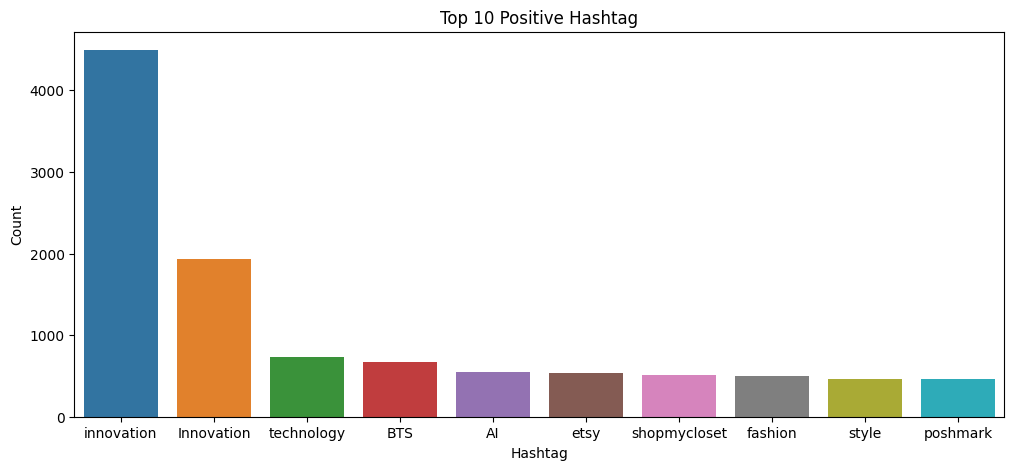

In [36]:
# Plotting Top 10 +ve hashtags
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(12,5))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.title('Top 10 Positive Hashtag')
plt.show()

###**Visualizing The Top 10 Negative Hashtag**

In [37]:
# Getting Negative Hashtag
freq = nltk.FreqDist(ht_negative)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,BadBunny,4
1,sobreportantlavida,1
2,bchydro,6
3,britishcolumbia,6
4,canada,7


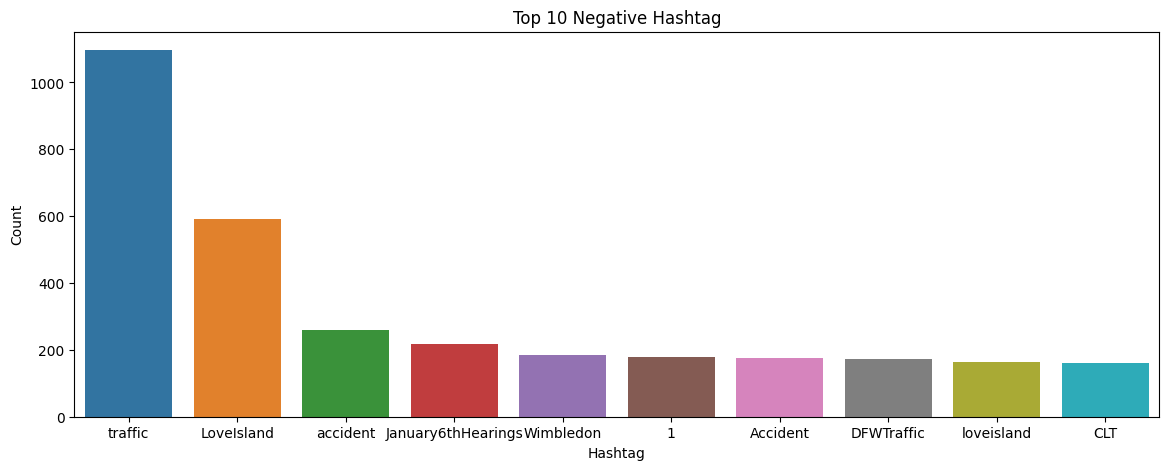

In [41]:
# Plotting Top 10 -ve Hashtag
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(14,5))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.title('Top 10 Negative Hashtag')
plt.show()

### **Visualizing Different Sentiments present in the dataset**

In [72]:
# Create a pie chart for Type.
colors = ['	#db0000', '	#564d4d']
labels = ['Positive', 'Negative','Uncertainity','Litigious']
positive = df.Label.value_counts()[0]
negative = df.Label.value_counts()[1]
uncertainty = df.Label.value_counts()[2]
litigious = df.Label.value_counts()[3]

fig = go.Figure(data=[go.Pie(labels=labels, values=[positive, negative, uncertainty, litigious], hole=.6)])
fig.update_layout(
    title_text="Different Labels Present in the Dataset",title_x=0.5, legend=dict(x=0.9),height=500, width=600,
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Type of Sentiment.', font_size=20, showarrow=False)])
fig.update_traces(marker=dict(colors=colors))

fig.show()
plt.show()

### **Visualizing The WordCloud For Positive Tweets**

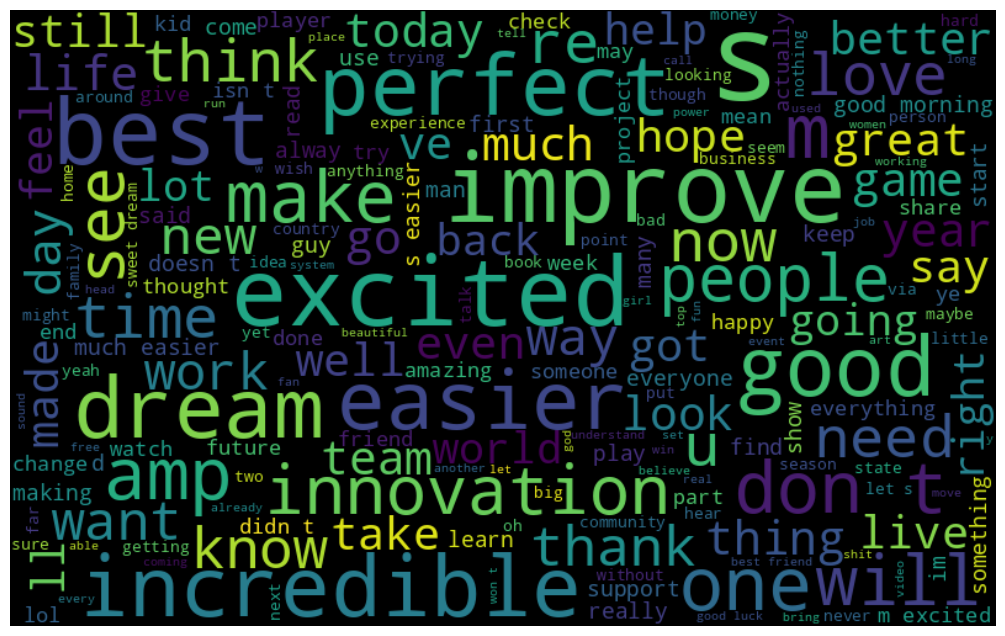

In [47]:
# frequent words visualization for +ve Tweets
positive_words = " ".join([sentence for sentence in df['Clean'][df['Label']== 'positive']])

positive_wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(positive_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### **Visualizing The WordCloud For Negative Tweets**

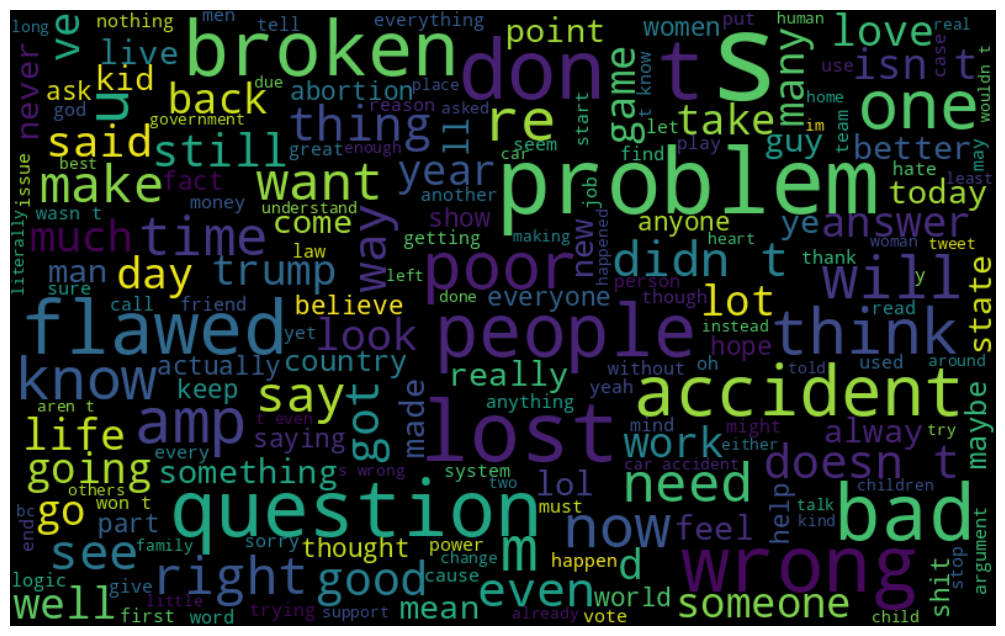

In [48]:
# frequent words visualization for -ve Tweets
negative_words = " ".join([sentence for sentence in df['Clean'][df['Label']== 'negative']])

negative_wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(negative_words)

# plotting the WordCloud
plt.figure(figsize=(15,8))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### **Visualizing The WordCloud For ALL Tweets**

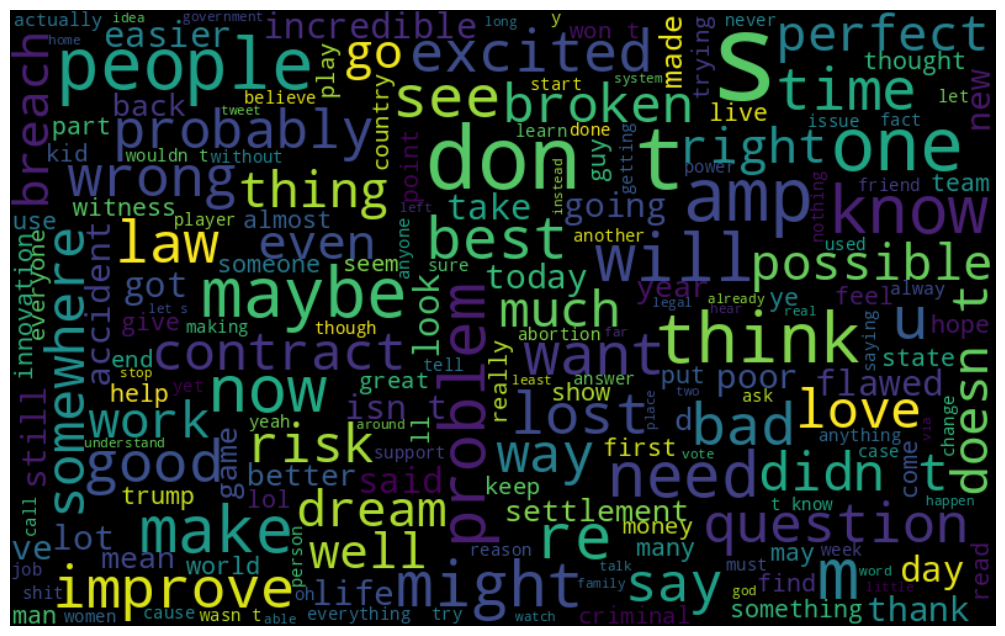

In [49]:
# visualize the frequent words
all_words = " ".join([sentence for sentence in df['Clean']])
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plotting the WordCloud
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

###Defining dependent and independent variables

In [50]:
X = df["Clean"]
Y = df["Label"]

###Data Splitting

In [52]:
# performing train test split
from sklearn.model_selection import train_test_split
X_train,x_test,Y_train,y_test = train_test_split(X,Y, test_size = 0.25)

###Using TfidfVectorizer to convert Text To Vectors

In [53]:
#importing TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
# Implementing TfidfVectorizer
vectorization = TfidfVectorizer()
analyze = vectorization.build_analyzer()
xv_train = vectorization.fit_transform(X_train)
xv_test = vectorization.transform(x_test)
print(xv_train.shape)
print(xv_test.shape)

(703390, 254057)
(234464, 254057)


##**ML Model Implementation**


## **Model selection**
##1. Logistic Regression
##2. Decision Tree Classification



# **ML Model - 1 - LOGISTIC REGRESSION**

In [56]:
# ML Model - 1 Implementation
# importing LogisticRegression
from sklearn.linear_model import LogisticRegression
# fitting the model
LR = LogisticRegression(max_iter=600)
LR.fit(xv_train,Y_train)
# Getting Prediction
pred_lr=LR.predict(xv_test)
print("The Accuracy of the Logistic Regression Model is {}".format(LR.score(xv_test,y_test)))

The Accuracy of the Logistic Regression Model is 0.9618363586733998


In [58]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_lr))

              precision    recall  f1-score   support

   litigious       0.98      0.96      0.97     50962
    negative       0.94      0.97      0.95     65791
    positive       0.97      0.96      0.96     66000
 uncertainty       0.96      0.96      0.96     51711

    accuracy                           0.96    234464
   macro avg       0.96      0.96      0.96    234464
weighted avg       0.96      0.96      0.96    234464



# **ML Model - 2 - Decision Tree Classification**

In [59]:
# ML Model - 1 Implementation
# importing DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# fitting the model
DT = DecisionTreeClassifier()
DT.fit(xv_train, Y_train)
# Getting the Prediction
pred_dt = DT.predict(xv_test)
print("The Accuracy of the Decision Tree Classifier Model is {}".format(DT.score(xv_test,y_test)))

The Accuracy of the Decision Tree Classifier Model is 0.9557671966698512


In [60]:
# Classification Report
print(classification_report(y_test,pred_dt))

              precision    recall  f1-score   support

   litigious       0.97      0.96      0.97     50962
    negative       0.94      0.96      0.95     65791
    positive       0.96      0.95      0.96     66000
 uncertainty       0.96      0.95      0.95     51711

    accuracy                           0.96    234464
   macro avg       0.96      0.96      0.96    234464
weighted avg       0.96      0.96      0.96    234464



##**Model Testing**

In [64]:
# Creating a Function to test whether a Tweet is Positive or negative
def pred(review):
    if review == 'negative':
       return "Review is Negative!"
    elif review == 'positive':
      return "Review is Positive!"
    else:
        return "Further analysis is required"

# Creating a Function for Manually Testing the Tweets
def manual_testing(tweets):
    testing_tweets = {"Clean":[tweets]}
    new_def_test = pd.DataFrame(testing_tweets)
    new_x_test = new_def_test["Clean"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction: {}".format(pred(pred_LR[0]),pred(pred_DT[0])))

###Testing the Tweets - 1

In [65]:
df['Clean'][5]

'it sucks for me since i m focused on the nature aspect of things but the environmental problems we have all have their roots in social  economic  amp  political issues  simply recycling or using renewable energy is like fixing the top floor of a building with an unsteady foundation'

In [66]:
tweet_1 = str(input())
manual_testing(tweet_1)

it sucks for me since i m focused on the nature aspect of things but the environmental problems we have all have their roots in social  economic  amp  political issues  simply recycling or using renewable energy is like fixing the top floor of a building with an unsteady foundation


LR Prediction: Review is Negative! 
DT Prediction: Review is Negative!


###Testing the Tweets - 2

In [68]:
df['Clean'][3]

'rwanda is set to host the headquarters of united nations development programme s  undp  new innovation financing facility    find out more       '

In [69]:
tweet_2 = str(input())
manual_testing(tweet_2)

rwanda is set to host the headquarters of united nations development programme s  undp  new innovation financing facility    find out more       


LR Prediction: Review is Positive! 
DT Prediction: Review is Positive!


###Testing the Tweets - 3

In [70]:
df['Clean'][7]

'  you can also relate this to art too    a lot of people are dismayed in starting art because of this kind of thing and i always try to tell them that everyone starts somewhere and those who are  good  by certain ages just trained enough to get there  like with anything you learn'

In [71]:
tweet_3 = str(input())
manual_testing(tweet_3)

  you can also relate this to art too    a lot of people are dismayed in starting art because of this kind of thing and i always try to tell them that everyone starts somewhere and those who are  good  by certain ages just trained enough to get there  like with anything you learn


LR Prediction: Further analysis is required 
DT Prediction: Further analysis is required
